<center><font size="6">Titanic Survival analysis</font></center>
<br>


> 0. [Background knowledge and problem discussion](#0-bullet) <br>
> 1. [Import Data & Python Packages](#1-bullet) <br>
> 2. [Data cleaning](#2-bullet) <br>
>     * [2.1 Drop unnessary columns](#2.1-bullet) <br>
>     * [2.2 Find the columns with missing values](#2.2-bullet) <br>
>     * [2.3 Missing values in Cabin](#2.3-bullet) <br>
>     * [2.4 Missing values in Embarked](#2.4-bullet) <br> 
>     * [2.5 Missing values in Age, Fare](#2.5-bullet) <br>
>     * [2.6 Extract the response variable in training set](#2.6-bullet) <br> 
> 3. [Exploratory Data Analysis](#3-bullet) <br> 
>     * [3.1 Age vs Survival](#3.1-bullet) <br>
>     * [3.2 Fare vs Survival](#3.2-bullet) <br>
>     * [3.3 Pclass vs Survival](#3.3-bullet) <br>
>     * [3.4 Embarked vs Survival](#3.4-bullet) <br>
>     * [3.5 With_cabin vs Survival](#3.3-bullet) <br>
>     * [3.6 Correlation plot](#3.4-bullet) <br>
> 4. [Pre-processing before fitting the model](#4-bullet) <br>
> 5. [Logistic Regression](#5-bullet) <br>
>     * [5.1 Fitting the model](#5.1-bullet) <br>
>     * [5.2 Calculation the  cross validation accuracy](#5.2-bullet) <br>
>     * [5.3 Fine-tune the logistic model using grid search](#5.3-bullet) <br>
>     * [5.4  find the  $\lambda$ optimize the model and plot the accuracy](#5.4-bullet) <br>
> 6. [Random Forest](#7-bullet) <br>
>     * [6.1 Fitting the model](#7.1-bullet) <br>
>     * [6.2 Calculation the  cross validation accuracy ](#7.2-bullet) <br>
>     * [6.3 Fine-tune  the RF using grid search ](#7.3-bullet) <br>
>     * [6.4 Find the optimized set of  parameter](#7.4-bullet) <br>
> 7. [Support Vector Machine](#7-bullet) <br>
>     * [7.1 Fitting the model](#7.1-bullet) <br>
>     * [7.2 Calculation the  cross validation accuracy](#7.2-bullet) <br>
>     * [7.3 Fine-tune  the SVM using grid search ](#7.3-bullet) <br>
>     * [7.4 Find the  set of  parameter](#7.4-bullet) <br>
> 8. [Naive Bayes](#8-bullet) <br>
>     * [8.1 Fitting the model](#8.1-bullet) <br>
>     * [8.2 Calculation the  cross validation accuracy](#8.2-bullet) <br>
>     * [8.3 Fine-tune  the NB moedel using grid search ](#8.3-bullet) <br>
>     * [8.4 Find the set of  parameter](#8.4-bullet) <br>
> 9. [Multi-layer Perceptron](#9-bullet) <br>
>     * [9.1 Fitting the model](#9.1-bullet) <br>
>     * [9.2 Calculation the  cross validation accuracy](#9.2-bullet) <br>
>     * [9.3 Fine-tune the Multi-layer Perceptron model using grid search ](#9.3-bullet) <br>
>     * [9.4 Find the set of  parameter](#9.4-bullet) <br>
> 10. [Write the output](#10-bullet) <br>
> 10. [Reference](#11-bullet) <br>



## Background knowledge and problem discussion  <a class="anchor" id="0-bullet"></a>

The sinking of the Titanic is one of the most tragic shipwrecks in history.On April 15, 1912, during her first voyage, the widely considered “unbreakable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some lucky guy who survivied, it seems some groups of people were more likely to survive than others. so we want to investigate which features does certain people have so they can better survive than others.

In our dataset, we are given the response variable "Survived". and 0 means dead, 1 means survived.
We want to solve this classification problem by fitting different machine learning model and fine-tune the model parameter. 

we mainly do our data anlysis report on five procedures based on kaggle competition requirement.
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.



## Import Data and Packages <a class="anchor" id="1-bullet"></a>

In [61]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, make_scorer, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
import sklearn.svm as svm
import matplotlib.pyplot as plt
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [96]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [97]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [98]:
train_data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data cleaning <a class="anchor" id="2-bullet"></a>

### 2.1    Drop unnessary columns <a class="anchor" id="2.1-bullet"></a>

> We can see that the `name` the `ticket number`and `passenager` has nothing to do with the survival rate, so we drop those three columns.

In [101]:

train_passid = train_data["PassengerId"]
test_passid = test_data["PassengerId"]
train_data = train_data.drop(["Name","Ticket","PassengerId"],axis = 1)
test_data = test_data.drop(["Name","Ticket","PassengerId"],axis = 1)



### 2.2    Find the columns with missing values <a class="anchor" id="2.2-bullet"></a>

In [67]:
train_data.isnull().any()



Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [68]:
null_columns = train_data.columns[train_data.isnull().any()]
train_data[null_columns].isnull().sum()


Age         177
Cabin       687
Embarked      2
dtype: int64

> We can see that for the training data,  the `Age` the `Cabin`and `Embarked` has missing values.

In [69]:
test_data.isnull().any()


Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Cabin        True
Embarked    False
dtype: bool

In [70]:
null_columns = test_data.columns[test_data.isnull().any()]
test_data[null_columns].isnull().sum()

Age       86
Fare       1
Cabin    327
dtype: int64

> We can see that for the testing data,  the `Age` the `Cabin`and `Fare` has missing values.

### 2.3    Missing values in Cabin <a class="anchor" id="2.3-bullet"></a>


First for the variable `Cabin` because they are too many missing datapoints on `Cabin`(almost 80% in both training and testing dataset), so we convert them to people with cabin and people without cabin for both train set and test set.

In [71]:
train_data['with_Cabin']= train_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_data['with_Cabin'] = test_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train_data = train_data.drop(["Cabin"],axis = 1)
test_data = test_data.drop(["Cabin"],axis = 1)

### 2.4    Missing values in Embarked <a class="anchor" id="2.3-bullet"></a>


In [72]:
most = train_data['Embarked'].value_counts()
most

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:

train_data['Embarked']=train_data['Embarked'].fillna("S")

>Then we try to fill the NA value in column `embarked` in training set with highest frequency value. which is "S"

### 2.5    Missing values in Age, Fare <a class="anchor" id="2.4-bullet"></a>


now we only have numeric variable `age` in both training and test data. and also `Fare` in testing data. we try to use the median to replace the missing value.


In [74]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

### 2.6    Extract the response variable in training set <a class="anchor" id="2.6-bullet"></a>


 Let us extract the response variable `Survival` in  training set.

In [75]:
ytrain= train_data.loc[:,["Survived"]]
Xtrain= train_data.drop(["Survived"],axis =1)
Xtest= test_data


In [76]:
np.sum(ytrain["Survived"]==0)

549


## 3 Exploratory Data Analysis <a class="anchor" id="3-bullet"></a>


### 3.1   Age vs Survival<a class="anchor" id="3.1-bullet"></a>


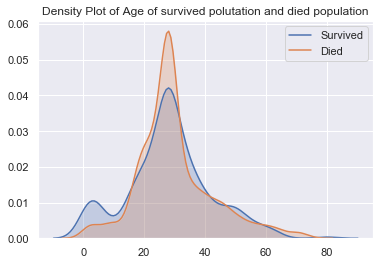

In [77]:
sns.set(color_codes=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 1], shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age of survived polutation and died population')
plt.show()

>We can see that the people from age 20 to 40 have higher chance of died. and the children and old people has more survival rate.The reason behind it is the policy which allow the young  and old to go first.

### 3.2   Fare vs Survival <a class="anchor" id="3.2-bullet"></a>


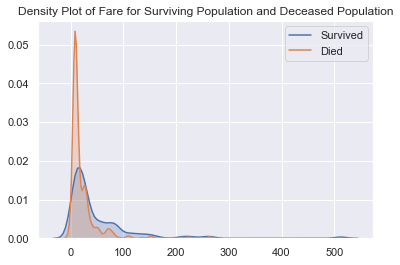

In [78]:
sns.set(color_codes=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 1], shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.show()

>we can see the people who purchase the cheap ticket has higher chance of died.

### 3.3  Pclass vs Survival <a class="anchor" id="3.3-bullet"></a>


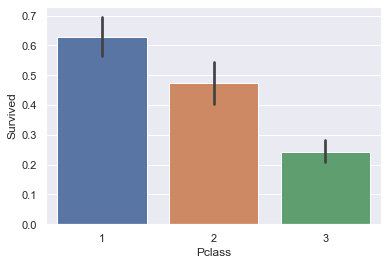

In [79]:
sns.barplot('Pclass', 'Survived', data=train_data)
plt.show()


>Unsurprisingly, being a first class passenger was higher chance of suvival.



### 3.4 Embarked vs Survival <a class="anchor" id="3.4-bullet"></a>


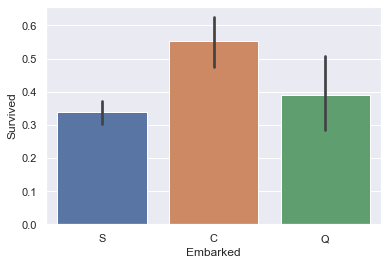

In [80]:
sns.barplot('Embarked', 'Survived', data=train_data)
plt.show()

>We can see that the passengers who embark at portal Cherbourg has higher chance of survival.

### 3.5 with_cabin vs Survival <a class="anchor" id="3.5-bullet"></a>


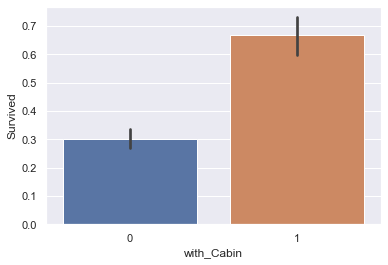

In [81]:
sns.barplot('with_Cabin', 'Survived', data=train_data)
plt.show()

>We can see that the passengers who has their own cabin have higher chance of survival.

### 3.6 Correlation plot<a class="anchor" id="3.6-bullet"></a>


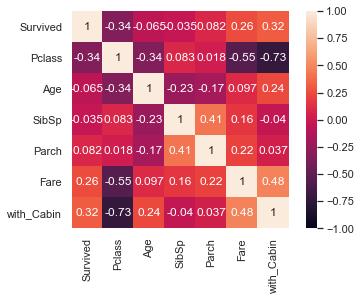

In [82]:
correalation = train_data.corr()

sns.heatmap(correalation,vmax = 1,square = True,annot = True,vmin = -1)

plt.show()

>About the correlation between the features, we can see that  "Pclass","with_cabin" seem to be highly related.We try to drop the variable who has less predictive power in term of survival rate, which is "with_cabin".

In [83]:
train_data = train_data.drop(["with_Cabin"],axis = 1)
test_data = test_data.drop(["with_Cabin"],axis = 1)

## 4. Pre-processing before fitting the model  <a class="anchor" id="4-bullet"></a>

In [84]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

num_attribs = list(Xtrain.drop(["Sex","Embarked","Pclass","SibSp"], axis = 1))
cat_attribs = ["Sex","Embarked","Pclass","SibSp"]


cat_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
    
])




Xtrain = cat_pipeline.fit_transform(Xtrain)
Xtest = cat_pipeline.fit_transform(Xtest)

The two pipelines mainly do those transfroms
1. Standardize features by removing the mean and scaling to unit variance
2. Encode categorical features as a one-hot numeric array.

In [85]:
Xtrain.shape

(891, 19)

In [86]:
Xtest.shape

(418, 19)

We can see that the number of columns has been expanded. This is due to encoding for categorical variables.

Now we have all the data processing  complete.

## 5. Logistic Regression  <a class="anchor" id="5-bullet"></a>

### 5.1 Fitting the model <a class="anchor" id="5.1-bullet"></a>


First let us fit a simple logistic regression.

In [27]:
logit_pipe = Pipeline([
    ('logistic_regression',LogisticRegression(solver='liblinear',penalty = 'l1',max_iter=10000))
])

logit_pipe.fit(Xtrain, ytrain);
ypreds = logit_pipe.predict(Xtrain)







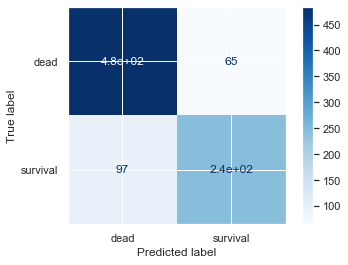

In [28]:
disp = plot_confusion_matrix(logit_pipe, Xtrain, ytrain,
                                 display_labels=["dead","survival"],
                                 cmap=plt.cm.Blues,)

>From the confusion matrix, we can see the sensitivity is around 71% and the specificity is around 73%. those two number is quite balanced. it is good model if we have equal preference interm of those two criterion.

### 5.2 Calculation the  cross validation accuracy<a class="anchor" id="5.2-bullet"></a>


 We make accuracy the scoring criterion  and calculate 5-fold cross validation error.

In [29]:
cv_scores = cross_val_score(logit_pipe, Xtrain, ytrain, cv = 5, scoring=make_scorer(accuracy_score))
print(f"Logistic Model CV accuracy is {cv_scores.mean():.3f}")

Logistic Model CV accuracy is 0.804


The logistic Model CV accuracy is not very good, we try to fine tune the model by using grid search.

### 5.3 Fine-tune the logistic model using grid search<a class="anchor" id="5.3-bullet"></a>


We use the lasso regression to fine tune model parameter, here we introduce the penalty factor $\lambda$. and we use the L1 regulation. the basic idea of it is passing a series of lambda value to the lasso model(in sklearn case, we pass the C, which is 1/ $\lambda$).And we will find the $\lambda$ which choose model with highest accruacy.

In [30]:
logLam = np.linspace(np.log(0.1),np.log(1000), 30)
lams = np.exp(logLam)
param_grid = {'logistic_regression__C': 1/lams}


lasso_gscv = GridSearchCV(logit_pipe, 
                          param_grid=param_grid, 
                          cv = 5,
                          scoring=make_scorer(accuracy_score),
                          n_jobs=-1,
                          iid = True,refit = True)


lasso_gscv.fit(Xtrain, ytrain)





GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic_regression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=10000,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l1',
                                                           random_state=None,
                               

In [31]:
print(f' lasso model accrucy is {lasso_gscv.best_score_:.3f}')
lg_score = lasso_gscv.best_score_




 lasso model accrucy is 0.807


### 5.4  find the  $\lambda$ optimize the model and plot the accuracy<a class="anchor" id="5.4-bullet"></a>


In [32]:
lasso_gscv.best_params_

{'logistic_regression__C': 3.856620421163471}

  We can see the regularization strength $\lambda$ is 1/C, which is equal to 0.26 .

Plot the score for lasso as a function of the log-regularization parameter

Text(0, 0.5, 'accuracy')

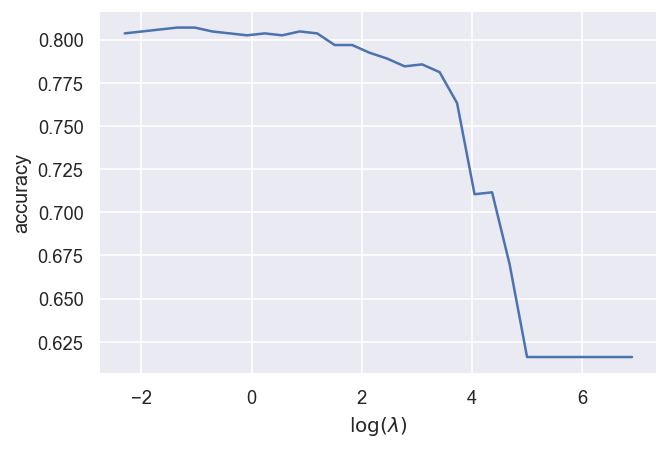

In [33]:
cv_results = pd.DataFrame(lasso_gscv.cv_results_)
fig, ax = plt.subplots(dpi = 120)
ax.plot(logLam,lasso_gscv.cv_results_['mean_test_score'], label = 'ride')
ax.set_xlabel(r'$\log(\lambda)$')
ax.set_ylabel('accuracy')



We can see as log($\lambda$) increase, the model accuracy slowly increase at first, and then keep stable for a while. and drop dramatically when log($\lambda$) is greater than 3.

## 6. Random Forest  <a class="anchor" id="6-bullet"></a>

### 6.1 Fitting the model <a class="anchor" id="6.1-bullet"></a>


Random forests, a tree-based machine learning technique, it is easy to interpreted and understanded. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a bagging of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees. compared to simple tree method. the Random forest reduce the varience and reduce the overfitting situation.



In [35]:
forest_reg = RandomForestClassifier(n_estimators=500, max_features=1)
forest_reg.fit(Xtrain, ytrain)






RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

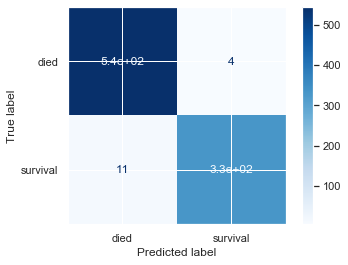

In [36]:
disp = plot_confusion_matrix(forest_reg, Xtrain, ytrain,
                                 display_labels=["died","survival"],
                                 cmap=plt.cm.Blues,)

>We can see that for the training set, the accuracy is very high compared to logistic model. it might suggest the existence of overfitting


### 6.2  Calculation the  cross validation accuracy <a class="anchor" id="6.2-bullet"></a>


In [37]:
cv_scores = cross_val_score(forest_reg, Xtrain, ytrain, cv = 5, scoring=make_scorer(accuracy_score))
print(f"Model CV accuracy is {cv_scores.mean():.3f}")

Model CV accuracy is 0.790


>We can see that for training data, the training accruacy is very high, however, for the validation set, the cross validtion error is very low
compared to training error. so the overfitting exsit. so we want to fine tune the model to reduce the overfitting.

### 6.3 Fine-tune  the RF using grid search <a class="anchor" id="6.3-bullet"></a>


we try to fine-tune random forest model by tuning 4 parameters: n_estimators, max_features, max_depth.

>n_estimators: The number of trees in the forest.<br>
>min_samples_leaf: The minimum number of samples required to be at a leaf node.<br>
>max_features:The number of features to consider when looking for the best split.<br>
>max_depth:The maximum depth of the tree. <br>



In [38]:
param_grid = [
{'n_estimators': [3, 10, 20,50,100,500], 'max_features': [2, 4, 6, 8,15,20],'max_depth':[None,5,6,7,8,15,20],'min_samples_leaf':[1,5,10]},
]

tree_gscv = GridSearchCV(forest_reg, param_grid, cv=5,
scoring=make_scorer(accuracy_score),
return_train_score=True)


tree_gscv.fit(Xtrain, ytrain)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=1,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False,
                                              random_sta

In [39]:

print(f'RF model accrucy is {tree_gscv.best_score_:.3f}')
tree_scoring = tree_gscv.best_score_


RF model accrucy is 0.831


 >After tuning the parameter, there is a significant increase interm of model accrucy from 0.788 to 0.832.


### 6.4 Find the optimized set of  parameter <a class="anchor" id="6.4-bullet"></a>


In [102]:
tree_gscv.best_params_

{'max_depth': 7,
 'max_features': 15,
 'min_samples_leaf': 1,
 'n_estimators': 500}

>We can see that the optimal model has the maxmium tree depth as 7. and try to consider 15 variable each time. 
and also, the minimal leave node has only has one element (can't split more).

## 7. Support Vector Machine  <a class="anchor" id="7-bullet"></a>

### 7.1 Fitting the model <a class="anchor" id="7.1-bullet"></a>


>In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.The SVM is effective in high dimensional spaces.



In [44]:
SVM_pipeline = Pipeline([
    ('SVM',svm.SVC(kernel="rbf",gamma ="auto"))
    ])
SVM_pipeline.fit(Xtrain,ytrain)






Pipeline(memory=None,
         steps=[('SVM',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

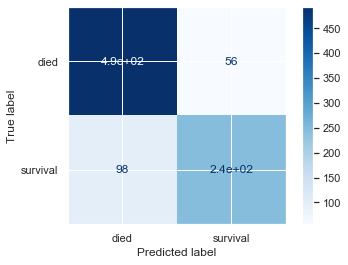

In [45]:
disp = plot_confusion_matrix(SVM_pipeline, Xtrain, ytrain,
                                 display_labels=["died","survival"],
                                 cmap=plt.cm.Blues,)

We can see that the training accruacy is less accurate than tree model.

### 7.2  Calculate the cross validation accuracy<a class="anchor" id="7.2-bullet"></a>


In [46]:

cv_scores = cross_val_score(SVM_pipeline, Xtrain, ytrain, scoring=make_scorer(accuracy_score),cv=5)
print(f"Model CV accuracy is {cv_scores.mean():.3f}")

Model CV accuracy is 0.816


### 7.3 Fine tune the model using the grid search  <a class="anchor" id="7.3-bullet"></a>


>Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel. And C decide if the margin is "soft" or "hard". a "Soft" margin allow more misclassfication around the seperation sphere.

In [47]:
param_grid = {'SVM__gamma': np.linspace(1e-5, 5),
              'SVM__C':np.linspace(1e-3, 10,10)
             
             }

svc_gscv = GridSearchCV(SVM_pipeline , 
                          param_grid=param_grid, 
                          cv = 5,
                          scoring={'accuracy':make_scorer(accuracy_score), 
                                   },
                          refit ='accuracy',
                          n_jobs=-1,
                          iid = True)

svc_gscv.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('SVM',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid=True, n_jobs=-1,
             param_grid={...
       3.26530959e+00, 3.36735020e+00, 3.46939082e+00, 3.57143143e+00,
       3.67347204e+00, 3.77551265e+00, 3.87755327e+00, 3.9

In [50]:
svc_score = svc_gscv.best_score_
print(f'SVC model accrucy is {svc_gscv.best_score_:.3f}')


SVC model accrucy is 0.824


### 7.4 find the $\gamma$  which optimize the model and plot the accuracy  <a class="anchor" id="7.4-bullet"></a>


In [52]:
svc_gscv.best_params_

{'SVM__C': 1.1119999999999999, 'SVM__gamma': 0.10205061224489796}

>The optimal c is 1.11 and the optimal gamma is 0.102

In [53]:
cv_results = pd.DataFrame(svc_gscv.cv_results_)


Text(0.5, 1.0, 'accuracy Results')

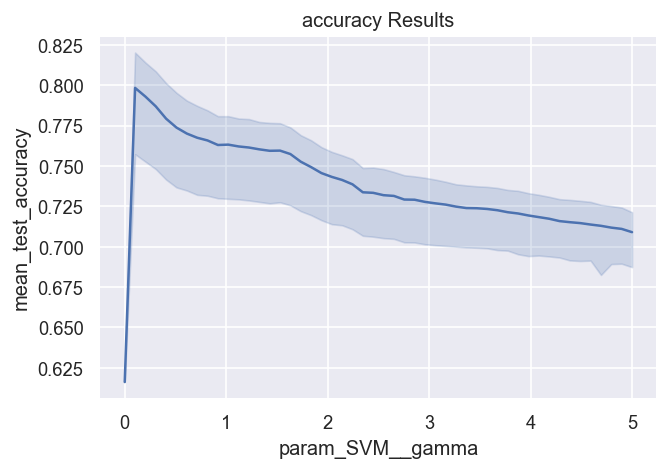

In [54]:
fig, ax = plt.subplots(dpi=120)
sns.lineplot(data = cv_results, x = 'param_SVM__gamma', y = 'mean_test_accuracy',ax = ax)
ax.set_title('accuracy Results')

>We can see as gammma increase, the model accuracy increase fast and gradually drop down.

## 8. Naive Bayes  <a class="anchor" id="7=8-bullet"></a>

### 8.1 Fitting the model <a class="anchor" id="8.1-bullet"></a>


In [40]:
NB_pipeline = Pipeline([
    ('clf', GaussianNB())
])

NB_pipeline.fit(Xtrain,ytrain)

ypred = NB_pipeline.predict(Xtrain)


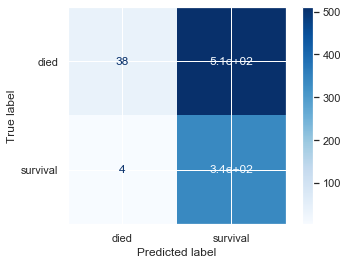

In [41]:
disp = plot_confusion_matrix(NB_pipeline, Xtrain, ytrain,
                                 display_labels=["died","survival"],
                                 cmap=plt.cm.Blues,)

>We can see the naive bayes model has very low specificity(0.07), which means only few of dead people are actually predicted as dead. but very high sensitivity(98%). The Naive bayes model tend to predict every people as survival.

### 8.2  Calculating the cross validation accuracy <a class="anchor" id="8.1-bullet"></a>


In [42]:
cv_scores = cross_val_score(NB_pipeline, Xtrain, ytrain, scoring=make_scorer(accuracy_score),cv=5)
print(f"Model CV accuracy is {cv_scores.mean():.3f}")

Model CV accuracy is 0.415


>We can see that the Naive bayes has very low model CV accuracy compared to rest of model. so we want to fine tune the model using grid search.

### 8.3  Fine tune the model with grid search <a class="anchor" id="8.3-bullet"></a>


The cross validation accuracy is very bad compared to logistic regression, random forest and SVM. so we need to fine tune the model. we can pass a series priors and smoothing variable into grid search.

In [43]:
parameters = {
    'clf__priors': [None,[0.5, 0.5],[0.32,0.68]],
    'clf__var_smoothing': np.logspace(0,-9, num=100)
}

grid_NB = GridSearchCV(NB_pipeline, param_grid=parameters)

grid_NB.fit(Xtrain, ytrain)
y_pred = grid_NB.predict(Xtrain)

nb_score = grid_NB.best_score_
print(f"Model CV accuracy is {grid_NB.best_score_:.3f}")



Model CV accuracy is 0.775


the Model CV accuracy has improved a lot by fine tuning the parameters, it has been imporved from 0.415 to 0.775

### 8.4  find the parameters which optimize the model accuracy <a class="anchor" id="8.4-bullet"></a>


In [122]:
grid_NB.best_params_

{'clf__priors': None, 'clf__var_smoothing': 0.04328761281083057}

 >The optimal parameter of prior is none, which means the prior is not predetermined and just calculated by percentage. And the optimal smoothing factor is 0.043.

### 9.1 Fitting the model <a class="anchor" id="9.1-bullet"></a>


In [51]:
MP_pipeline = Pipeline([
    ('clf', MLPClassifier(random_state=1, max_iter=300))
])

MP_pipeline.fit(Xtrain,ytrain)





Pipeline(memory=None,
         steps=[('clf',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=300, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

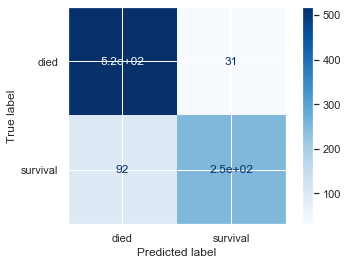

In [52]:
disp = plot_confusion_matrix(MP_pipeline, Xtrain, ytrain,
                                 display_labels=["died","survival"],
                                 cmap=plt.cm.Blues,)

>We can see that specificity is very high(94%). The sensitivity is lower (75%).which means around 25% of survival people are predicted as dead. We can see that the Perceptron tend to predict people as dead

### 9.2 Calculate the cross validation accuracy<a class="anchor" id="9.2-bullet"></a>


In [53]:
cv_scores = cross_val_score(MP_pipeline, Xtrain, ytrain, scoring=make_scorer(accuracy_score),cv=5)
print(f"Model CV accuracy is {cv_scores.mean():.3f}")

Model CV accuracy is 0.827


We can see that the multi-layer perceptron has a highest cross validation (0.827) among all models. 

### 9.3 Fine tune the Multi-layer Perceptron using grid search <a class="anchor" id="9.3-bullet"></a>


>for the Multi-layer Perceptron model, we try to fine tune the model by adjust those 5 parameters.<br>
1. hidden_layer_sizes: the hidden layers in the nerual network.<br> 
2. activation: Activation function for the hidden layer.<br>
3. batch_size:Size of minibatches for stochastic optimizers.<br>
4. alpha:L2 penalty (regularization term) parameter.<br>
5. learning_rate_init: how far it will go for each step.<br>




In [54]:
parameters = {
    'clf__hidden_layer_sizes': [(100, 100), (100)],
    'clf__activation':['sgd','tanh'],
    'clf__batch_size':['auto',50,100],
    'clf__alpha':[0.0001,0.01,1],
     'clf__learning_rate_init':[0.001,0.1,10],
    
}


grid_MP = GridSearchCV(MP_pipeline, param_grid=parameters)
grid_MP.fit(Xtrain,ytrain)


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='constant',
                                                      learning_rate_init=0.001,
                                                      max_fun=15000,
                                                      max_iter=300,
                                                    

In [55]:
mp_score = grid_MP.best_score_
print(f"Model CV accuracy is {grid_MP.best_score_:.3f}")

Model CV accuracy is 0.826


### 9.4 Fine the optimized set of variables <a class="anchor" id="9.3-bullet"></a>


In [132]:
grid_MP.best_params_

{'clf__activation': 'tanh',
 'clf__alpha': 0.01,
 'clf__batch_size': 100,
 'clf__hidden_layer_sizes': (100, 100),
 'clf__learning_rate_init': 0.001}

>We can see that the optimal parameter are: tanh as activation function, penalty as 0.01, learning rate as 0.001, batch size as 100
    and hidden layer as 100*100.


## 10 Write the output<a class="anchor" id="10-bullet"></a>

In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Randomforest', 'support vector machine', 
               'Naive Bayes', 'Multiple Perceptron' ],
    'Score': [lg_score,tree_scoring, svc_score, 
              nb_score, mp_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Randomforest,0.830532
4,Multiple Perceptron,0.826050
2,support vector machine,0.823793
0,Logistic Regression,0.806958
3,Naive Bayes,0.774509


>he randomforest has highest accuracy, so we try to output the result using random forest model.

In [93]:
ypred = tree_gscv.predict(Xtest)


,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [105]:
submission = pd.DataFrame({
        "PassengerId":test_passid,
        "Survived": ypred
    })

submission.to_csv('submission.csv', index=False)

<img src="WeChatccbed304d2ddb0e203892e99c98a30ae.png"> 

## 11 Reference<a class="anchor" id="11-bullet"></a>

Support Vector Machine,https://scikit-learn.org/stable/modules/svm.html<br>
Titanic science solution https://www.kaggle.com/startupsci/titanic-data-science-solutions<br>
Titanic - Machine Learning from Disaster https://www.kaggle.com/santhraul/titanic-machine-learning-from-disaster<br>
Random Forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>

